In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import train_test_split, KFold,cross_validate,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from keras.utils.np_utils import to_categorical

%matplotlib inline

Using TensorFlow backend.


In [2]:
path = os.getcwd()

In [3]:
df =pd.read_csv(path +'/Kickstarter/cleaned_kick_data01.csv')

In [4]:
df.shape

(85233, 17)

In [5]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA


In [6]:
df.status.value_counts()

successful    42927
failed        42306
Name: status, dtype: int64

In [7]:
#对标称属性进行独热编码，转化为数值属性
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oh = OneHotEncoder()
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['pledged'] =le.fit_transform(df['pledged'].values)
# df['spotlight'] =le.fit_transform(df['spotlight'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)
df['currency'] =le.fit_transform(df['currency'].values)

In [8]:
#对类别信息进行处理
df['continent'] = to_categorical(df['continent']) 
df['category'] =to_categorical(df['category'])
df['country'] =to_categorical(df['country'])
df['city'] =to_categorical(df['city'])
df['state'] =to_categorical(df['state'])
df['currency'] =to_categorical(df['currency'])

In [9]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,0.0,0.0,2017-01-11,0.0,2017-02-15,1.261110,40000.0,"London, UK",0,0,failed,34,11,0.0,0.0,0.0
1,12,0.0,0.0,2016-02-28,0.0,2016-03-29,0.748587,5000.0,"London, Canada",717,0,failed,29,28,1.0,0.0,0.0
2,1,0.0,0.0,2016-02-13,1.0,2016-03-19,0.722499,5000.0,"Perth, AU",1,0,failed,34,13,0.0,0.0,0.0
3,3,0.0,0.0,2015-05-25,0.0,2015-07-01,1.000000,1900.0,"Austin, TX",166,0,failed,36,25,1.0,0.0,0.0
4,2,0.0,0.0,2018-05-18,0.0,2018-06-17,1.000000,30000.0,"Los Angeles, CA",7,0,failed,29,18,1.0,0.0,0.0


In [10]:
df['status'] =df.status.str.contains('successful').astype(int)

In [11]:
X =df.drop(columns=['backers_count', 'created_at', 'deadline','staff_pick', 'location', 'status'], axis=1)
y =df['status']

In [12]:
X.head()

,category,country,currency,fx_rate,goal,pledged,duration,created_day,continent,city,state
0,0.0,0.0,0.0,1.261110,40000.0,0,34,11,0.0,0.0,0.0
1,0.0,0.0,0.0,0.748587,5000.0,717,29,28,1.0,0.0,0.0
2,0.0,0.0,1.0,0.722499,5000.0,1,34,13,0.0,0.0,0.0
3,0.0,0.0,0.0,1.000000,1900.0,166,36,25,1.0,0.0,0.0
4,0.0,0.0,0.0,1.000000,30000.0,7,29,18,1.0,0.0,0.0


In [13]:
#使用管道进行数据标准化和回归模拟
#使用10倍交叉验证的逻辑回归
ss =StandardScaler()
lr =LogisticRegressionCV(cv=10)
# kfold =KFold(n_splits=5, shuffle=True, random_state=0)
lr_pipe =  Pipeline([('sscale', ss),('logreg', lr)])

In [14]:
X_train, X_test, y_train, y_test =train_test_split(X, y ,test_size =0.2, random_state =1)

In [15]:
start_time =time.time()
lr_pipe.fit(X_train, y_train)
end_time =time.time()
dtime = end_time - start_time
print('运行时间: %.8s s'%dtime)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


运行时间: 4.054231 s


In [16]:
lr_pipe.score(X_train, y_train)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8483706332678262

In [17]:
lr_pipe.score(X_test, y_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8531706458614419

In [18]:
y_pred = lr_pipe.predict(X_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [20]:
print('the f1_score of LogisticRegression:',f1_score(y_test, y_pred, average="macro"))
print('the precision_score of LogisticRegression:', precision_score(y_test, y_pred, average="macro"))
print('the recall_score of LogisticRegression:',recall_score(y_test, y_pred, average="macro")) 

the f1_score of LogisticRegression: 0.8525745238182529
the precision_score of LogisticRegression: 0.8578375441023651
the recall_score of LogisticRegression: 0.8527382800943514


In [21]:
from  sklearn.metrics import roc_curve,auc

In [22]:
fpr_lr, tpr_lr, thrsholds_lr =roc_curve(y_test, lr_pipe.predict_proba(X_test)[:,1])

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


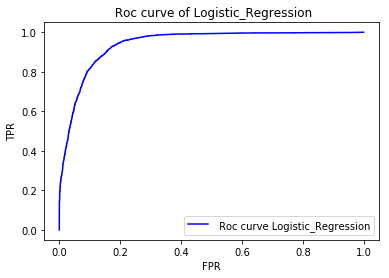

In [23]:
plt.plot(fpr_lr, tpr_lr, label =' Roc curve Logistic_Regression', color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(' Roc curve of Logistic_Regression')
# plt.plot(fpr[close_zero], tpr[close_zero], 'o', marksize =10, label ='thrshold zero rf', fillstyle = 'none', c ='k', mew =2)
plt.legend(loc =4)

In [24]:
print('auc of Logistic_Regression', auc(fpr_lr, tpr_lr))

auc of Logistic_Regression 0.9405661644295041
